# Clase 4 

## Estimation of distribution Algorithms (EDAs)

Algoritmos geneticos reemplazan los operadores geneticos tradicionales (cruce y mutación) por la construccion y muestreo de modelos probabilísticos de soluciones prometedoras 

___
Se usa un modelo probabilistico explicito que represente una distribucion de probabilidad sobre soluciones

#### **Como trabaja:**
1. Poblacion generada aleatoriamente
2. Cada iteración comianza creando una población de soluciones candidatas prometedoras utilizando el operador de seleccion que da peferencias a las soluciones de mejor calidad
3. Construye un modelo probabilistico para soluciones seleccionadas
4. Crean nuevas soluciones muestreando la distribucion codificada por el modelo construido
5. Nuevas soluciones se incorporan a la poblacion original

t<-0
generate population of random
while not satisfied
    evaluate alk candidate solutions
    select promision solutions
    buildl probabilistic model
    
___
## UMDA (Univariate Marginal Distribution Algorithm)
Asume que las variables (genes) de un cromosoma son independientes entre si. Esto significa que el modelo de probabilidad para un individuo de N variables binarias se factorizan como un producto de distribuciones marginales univariadas

#### **Como trabaja:**
1. Poblacion al azar
2. Evalua fundion objetivo
3. Estimacion del modelo probabilidad: 

Estaba enfermo asi que luego apuntas bien

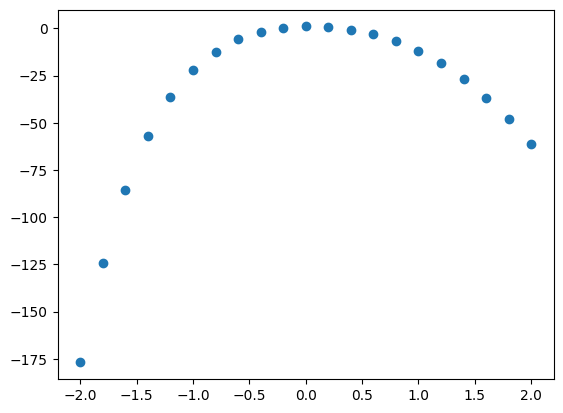

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

info_excel=pd.read_excel('data.xlsx', sheet_name='Sheet1')
plt.scatter(info_excel['x'], info_excel['y'])
plt.show()
xs=info_excel['x'].to_numpy()
ys=info_excel['y'].to_numpy()


In [2]:
xs

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
        0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ])

In [ ]:

def inicioPob(n,l,Imin,Imax):
    poblacion = np.random.uniform(Imin, Imax, (n,l))
    return poblacion

def funcion(individuo,x):
    a0=individuo[0]
    a1=individuo[1]
    a2=individuo[2]
    a3=individuo[3]
    a4=individuo[4]
    a5=individuo[5]
    f = a0*x+a1*x**2+a2*x**3+a3*x**4+a4*x**5+a5*x**6
    return f

def fitness(poblacion):
    [r,c]=poblacion.shape
    evaluacion=[]
    for individuo in poblacion:
        error=0
        for i in range(len(xs)):
            y_propuesta=funcion(individuo,xs[i])
            error+=(ys[i]-y_propuesta)**2
        evaluacion.append(error/len(xs))
    return np.array(evaluacion)

def BUMDA_media_stds(poblacion, g, Imin, Imax, beta=1):
    [m,d]=poblacion.shape
    Z=m/((Imax-Imin)*np.sum(np.exp(beta*g)))
    mu=np.zeros(d)
    sigma=np.zeros(d)
    for j in range(d):
        xj=poblacion[:,j]
        mu_term1=((1/(Z*beta))*np.sum(np.exp(beta*g)*xj))
        denom_mu=np.sum(g*xj)/denom_mu
        

def seleccion_ranking(poblacion, ps, Imin, Imax):
    [r,c] = poblacion.shape
    nueva_poblacion = np.zeros((r, c))
    n = int(ps*r)
    aptitud = fitness(poblacion).reshape(r,1)
    pob_ampliada = np.concatenate((poblacion,aptitud), axis=1)
    indices = np.argsort(pob_ampliada[:,-1])
    pob_ordenada = pob_ampliada[indices]
    pob_ordenada_seleccionada = pob_ordenada[0:n,:]
    pob_ordenada_seleccionada_final = pob_ordenada_seleccionada[:,0:c]

    medias_desviaciones = []
    for columna in pob_ordenada_seleccionada_final.T:
        medias_desviaciones.append([columna.mean(), columna.std()])
    for i in range(r):
        if i < n:
            nueva_poblacion[i] = pob_ordenada_seleccionada_final[i]
        else:
            nueva_poblacion[i] = [np.random.normal(c_mean, c_std) for c_mean, c_std in medias_desviaciones]
    return nueva_poblacion



[  2.16914634 -12.67422335   1.83336709  -4.4579102    1.23123332
   0.04574565]
0.3647218352643302


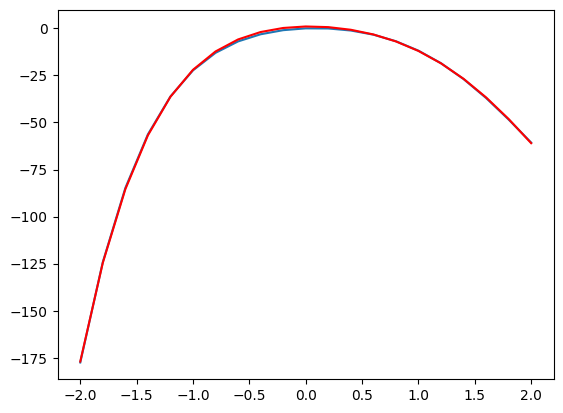

In [5]:
n=100
l=6
generaciones=1000
ps=0.5 #porcentaje de seleccion
Imin=-100
Imax=100

P=inicioPob(n,l,Imin,Imax)

for k in range(generaciones):
    P=seleccion_ranking(P, ps,Imin, Imax)

x_mejor=P[0]
print(x_mejor)
print(fitness(P)[0])
plt.plot(info_excel['x'], [funcion(x_mejor, x) for x in info_excel['x']])
plt.plot(info_excel['x'], info_excel['y'], color='red')
plt.show()